number of errors:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
number of errors with h:  [220, 336, 447, 555, 1097, 2287, 5575, 19836, 84625, 562307]
final number of errors:  [220, 336, 447, 555, 1097, 2287, 5575, 19836, 84625, 562307]
number of iterations:  [1730, 3280, 4620, 7009, 17162, 42285, 129467, 556666, 2933977, 24152605]
bit error rate:  [0.057803468208092484, 0.03048780487804878, 0.021645021645021644, 0.014267370523612499, 0.00582682671017364, 0.0023649048125812936, 0.0007723975993882611, 0.000179640933701717, 3.408343010187196e-05, 4.140340141363634e-06]


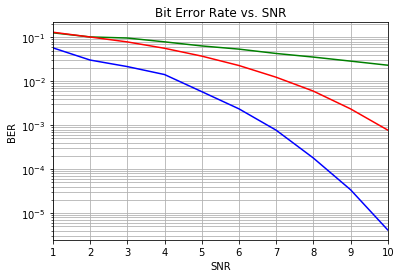

In [63]:
# week 1 code
import matplotlib.pyplot as plt
from math import sqrt
import random
from cmath import phase, exp

sigma = []
for i in range(1,11):
    sigma.append(1 / sqrt((10**(i/10))))                    # populates sigma with the appropriate values

num_errors = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_errors_h = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_errors_final = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iterations = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):                                      # this loop allows us to cycle through sigmas
    while num_errors[i] < 100:        # this loop goes until too many errors
        iterations[i] += 1                                     # keeps track of how many cycles we do
        # assigns x based on u
        u = random.randint(0, 1)                        # creates a random binary number that will act as our signal
        x = 2*u - 1                                     # assigns the value of x

        # adding in h to acct for fading
        h = random.normalvariate(0, sqrt(.5)) + 1j*random.normalvariate(0, sqrt(.5))
        mag_h = abs(h)
        phase_h = phase(h)

        #z = random.gauss(0, sigma[i-1])                     # creates noise based on the sigma value
        z_final = random.normalvariate(0, sigma[i]/sqrt(2)) + 1j*random.normalvariate(0, sigma[i]/sqrt(2))

        y = x + z_final
        y_h = mag_h*x + z_final                                           # simulates the received signal
        y_tilde = exp((-1j)*phase_h) * (h*x) + z_final

        # demodulator compare mag and phase
        if y.real < 0:
            u_estimate = 0
        else:
            u_estimate = 1
        # demod with fading
        if y_h.real < 0:
            u_est_h = 0
        else:
            u_est_h = 1
        # final demod
        if y_tilde.real < 0:
            u_est_final = 0
        else:
            u_est_final = 1

        # checks for error
        if u != u_estimate:
            num_errors[i] += 1  # updates the number of errors
            #print("num errors: ", num_errors)

        if u != u_est_h:
            num_errors_h[i] += 1
            #print("errors h: ", num_errors_h)

        if u != u_est_final:
            num_errors_final[i] += 1
            #print("errors final: ", num_errors_final)

print("number of errors: ", num_errors)
print("number of errors with h: ", num_errors_h)
print("final number of errors: ", num_errors_final)
print("number of iterations: ", iterations)

# plot the results
snr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bit_error_rate = []
bit_error_rate_h = []
ber_final = []
for i in range(10):
    bit_error_rate.append(num_errors[i] / iterations[i])
    bit_error_rate_h.append(num_errors_h[i] / iterations[i])
    ber_final.append(num_errors_final[i] / iterations[i])

print("bit error rate: ", bit_error_rate)
plt.semilogy(snr, bit_error_rate, color='blue')
#plt.semilogy(snr, bit_error_rate_h)
plt.semilogy(snr, ber_final, color='green')

# plotting week 1 using error function results
snr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
error = [.131, .102, .0789, .0565, .0375, .0229, .0124, .00599, .00236, .0007765]
plt.semilogy(snr, error, color='red')

plt.legend(['AWGN', 'Fading python', 'Fading error function'])
plt.title("Bit Error Rate vs. SNR")
plt.xlabel("SNR")
plt.ylabel("BER")
plt.xlim([1, 10])
plt.grid(True, which="both")
plt.show()


In [1]:
# week 2 code
from math import sqrt
from cmath import exp, phase
from random import randint, normalvariate
import matplotlib.pyplot as plt

# calculating values of sigma
sigma = []
for i in range(1,11):
    sigma.append(1 / sqrt((10**(i/10))))       

A = 1 / sqrt(5) #A value for energy to equal 1

#loc_1, 2, 3, 4 are the four symbols
loc_1 = -3*A
loc_2 = -1*A
loc_3 = A
loc_4 = 3*A

# declaring the necessary arrays
num_bit_errors_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_symbol_errors_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_bit_errors_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_symbol_errors_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iterations = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# start the loop
for i in range(10):
    while num_bit_errors_1[i] < 100000:
        iterations[i] += 1
        #U is RV (0-3)
        u = randint(0,3)

        # x1-natural mapping, x2-gray mapping
        if u == 0: 
            x1 = loc_1
            x2 = loc_1
        if u == 1: 
            x1 = loc_2
            x2 = loc_2
        if u == 2: 
            x1 = loc_3
            x2 = loc_4
        if u == 3: 
            x1 = loc_4
            x2 = loc_3
    
        # noise effect
        z = normalvariate(0, sigma[i]/sqrt(2)) + 1j*normalvariate(0, sigma[i]/sqrt(2))
        # fading effect
        h = normalvariate(0, sqrt(.5)) + 1j*normalvariate(0, sqrt(.5))
        # received value, y
        y1 = exp((-1j)*phase(h)) * (h*x1) + z
        y2 = exp((-1j)*phase(h)) * (h*x2) + z
                
        # demodulate y1
        if y1.real < -2*A: u_est_1 = 0
        elif -2*A <= y1.real <= 0: u_est_1 = 1
        elif 0 < y1.real <= 2*A: u_est_1 = 2
        elif y1.real > 2*A: u_est_1 = 3
        
        # demodulate y2
        if y2.real < -2*A: u_est_2 = 0
        elif -2*A <= y2.real <= 0: u_est_2 = 1
        elif 0 < y2.real <= 2*A: u_est_2 = 3
        elif y2.real > 2*A: u_est_2 = 2
            
        # check for error in natural mapping
        if u != u_est_1: 
            num_symbol_errors_1[i] += 1
            num_bit_errors_1[i] += 1  # at least one bit will be off
        if u + u_est_1 == 3: num_bit_errors_1[i] += 1  # this determines if there is two bits of error
        
        # check for error in gray mapping
        if u != u_est_2:
            num_symbol_errors_2[i] += 1
            num_bit_errors_2[i] += 1
        if u + u_est_2 == 3: num_bit_errors_2[i] += 1
                
print("symbol errors natural: ", num_symbol_errors_1)
print("bit errors natural: ", num_bit_errors_1)
print("symbol errors gray: ", num_symbol_errors_2)
print("bit errors gray: ", num_bit_errors_2)

# plot the results
snr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bit_error_rate_1 = []
sym_error_rate_1 = []
bit_error_rate_2 = []
sym_error_rate_2 = []
for i in range(10):
    bit_error_rate_1.append(num_bit_errors_1[i] / iterations[i])
    sym_error_rate_1.append(num_symbol_errors_1[i] / iterations[i])
    bit_error_rate_2.append(num_bit_errors_2[i] / iterations[i])
    sym_error_rate_2.append(num_symbol_errors_2[i] / iterations[i])
    
#print("bit error rate: ", bit_error_rate)
plt.semilogy(snr, bit_error_rate_1, color='blue')
plt.semilogy(snr, sym_error_rate_1, color='blue', linestyle='--')
plt.semilogy(snr, bit_error_rate_2, color='red')
plt.semilogy(snr, sym_error_rate_2, color='red', linestyle='--')
plt.legend(['Natural Map bit','Natural Map symbol', 'Gray Map bit','Gray Map symbol'])
plt.title("Bit Error Rate vs. SNR")
plt.xlabel("SNR")
plt.ylabel("BER")
plt.xlim([1, 10])
plt.grid(True, which="both")
plt.show()


symbol errors natural:  [77470, 77488, 77647, 78000, 78716, 79370, 80545, 81843, 83279, 84844]
bit errors natural:  [100000, 100001, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
symbol errors gray:  [77691, 77485, 77560, 77699, 78708, 79331, 80953, 81545, 83512, 84736]
bit errors gray:  [86628, 85166, 83931, 83040, 83208, 83272, 84358, 84458, 86171, 87008]


<Figure size 640x480 with 1 Axes>

In [61]:
# gray mapping is better than natural mapping. Why?
# with natural mapping there is a 2 bit difference in the middle (01, 10) if we change it to (01, 11) in the middle
# then even if there is a symbol error made there will only be one bit error.
# Gray mapping reduces bit error.

In [118]:
# IST implementation
import numpy as np

def ist(y_vec, a_mat, s, lamb, iterations):
    # y_vec is the recieved message
    # a_mat is the sensing matrix
    # s, lamb combine to be the parameter for the soft thresholding func
    # returns a guess for the original message, x
    
    y_work = y_vec.copy() # copy y to work with without changing original
   # print("y ", y_vec.shape)
    x_length = a_mat.shape[1]  # x_length is the second dimension of A
    # make initial guess for x (all zeroes)
    x = np.array([0 for d in range(x_length)]).reshape(-1, 1) #reshape changes how it is stored in mem. Transpose is temp change
   # print("x ", x.shape)
   # print("a ", a_mat.shape)
    x_new = x.copy() #initializes the value to be used later. copy creates a deep copy
    t = 0 # number of iterations
    
    #for mse calc
    error_sum = []
    
    #iterative process
    while(t < iterations):
        t += 1
       # print("x in loop ", x_new.shape)
        z = y_work - np.matmul(a_mat, x_new) # calculates residual error
    
        # update the guess of x
        #send_eta = x + np.multiply(s, np.matmul(a_mat.transpose(), z))
        send_eta = x.__add__(np.multiply(s, np.matmul(a_mat.transpose(), z)))
        x_new = eta(send_eta, s*lamb)
        #print(x_new.shape)
        
        # x is a vector and therefore you need to do this element wise
        error = 0
        for i in range(x.shape[0]):
            error += (x[i] - x_new[i])**2
        error_sum.append(error / t)  #for mse calc
    
    print("x shape ", x_new.shape)
    
    # can change this to return the estimated value of x if needed
    error_sum = np.array(error_sum)  #converts the list to an array
    print(error_sum.shape)
    return error_sum # returns error sum for mse


def eta(u, T):
    i = 0 
    for element in u:
        if element >= T: u[i] = element - T
        elif element <= -1*T: u[i] = element + T
        else: u[i] = 0
        i += 1
    return u
        
# you will be receiving 2D arrays
# this is wrong x is a row array. rx1
'''def eta(u, T):
    work = u.copy
    i = 0 #rows
    j = 0 #columns
    for i in range(u.shape[0]):
        for j in range(u.shape[1]):
            if u[i][j] >= T: work[i][j] = work[i][j] - T
            elif u[i][j] <= -1*T: work[i][j] = work[i][j] + T
            else: work[i][j] = 0
           # print("u in eta func ", u)
            j += 1
        i += 1
        return work'''


'def eta(u, T):\n    work = u.copy\n    i = 0 #rows\n    j = 0 #columns\n    for i in range(u.shape[0]):\n        for j in range(u.shape[1]):\n            if u[i][j] >= T: work[i][j] = work[i][j] - T\n            elif u[i][j] <= -1*T: work[i][j] = work[i][j] + T\n            else: work[i][j] = 0\n           # print("u in eta func ", u)\n            j += 1\n        i += 1\n        return work'

In [117]:
#testing ist matrix dimensions
y = np.array([0,1,1]).reshape(-1, 1) #makes this into column vector
A = np.array([[1, 2], [1,3], [2, 3]])
ist(y, A, .1, .2, 3)
#keep getting this error and I cannot find out why

(2, 1)
(2, 1)
(2, 1)
x shape  (2, 1)
(3, 1)


array([[0.4148    ],
       [0.582746  ],
       [4.37707905]])

In [17]:
#AMP implementation
def amp(y_vec, a_mat, tau, iterations):
    #returns original message, x
    #y_vec is recevied signal
    #a_mat is sensing matrix
    #tau is the thresholding parameter
    
    y_work = y_vec.copy() # copy y to work with without changing original
    x_length = a_mat.shape[1]  # x_length is the second dimension of A
    # make initial guess for x (all zeroes)
    x = [0 for d in range(x_length)]
    
    x_new = x #initializes the value to be used later
    t = 0 # number of iterations
    mu = 0 # initial onsager value
    
    while(t < iterations):
        t += 1
        x = x_new
        
        z = y_work - np.matmul(a_mat, x) + mu # calculates residual error
        r_vec = x + np.matmul(a_mat.transpose(), z)
        x_new = eta(r_vec, tau)
        
        #onsager caluclated at end bc it needs to use previous iteration values
        mu = onsager(z, a_mat, r_vec, tau)
        
def onsager(z, a, r, tau):
    #returns onsager term
    temp = z/(a_mat.shape[0]) #will be multplied by sum of eta
    total = 0
    
    for j in range(1, 1001): #assuming N = 1000
        total += eta(r_vec, tau)
        
    return temp*total
    
def eta(u, T):
    i = 0 
    for element in u:
        if element >= T: u[i] = element - T
        elif element <= -1*T: u[i] = element + T
        else: u[i] = 0
        i += 1
    

In [2]:
#IST/AMP Exercise
import numpy as np
import matplotlib.pyplot as plt

#1 generate k-sparse of length N
N = 1000
# intially all non-zero elements will be 1
non_zero_indices = []
non_zero_indicies = np.random.permutation(N)[0:40] #takes the first 40 elements in a permutation of numbers 0-999
x = np.zeros(N) #initially make x all zero
for elm in non_zero_indices:
    x[elm] = 1  #can change this to be more complex

#print("x shape ", x.shape)

#2
mat_of_ys = [] #this will be an arrays of arrays of y's
mat_of_As = [] # matrix of A matrices
#generating A and w (noise matrix)
cnt = 0
for n in range(225, 501, 25):
    mat_of_As.append(np.sqrt(1/n) * np.random.randn(n, N))
    # w needs to be same dimensions as y ()
    w = .05 * np.random.randn(n)
    mat_of_ys.append(np.matmul(mat_of_As[cnt], x) + w) #adds a y to the array of y's
    cnt = cnt + 1
    
#3 run 200 iterations of IST for n = 250
#the 1 value of matrix corresponds to n = 250
#print("w shape ", w.shape)
#print("y_mat[1] ", mat_of_ys[1].shape)
#print("A_mat[1] ", mat_of_As[1].shape)
#mse = []
mse = ist(mat_of_ys[1], mat_of_As[1], .2, .1, 200)
iteration_count = [i for i in range (1, 201)]

print("mse shape ", mse.shape)  # this needs to be a 1D array. figure out what is happening.
#plt.plot(iteration_count, mse)
#plt.xlim([195, 200])
#plt.show

    
#4 200 ist for all the n values
#for i in range(200):
 #   ist(mat_of_ys[i], mat_of_As[i], .2, .1, 200)
    


NameError: name 'ist' is not defined

[4.93706838e+73 3.95271252e-03 4.98869736e-03 2.18909230e-03
 1.56996872e-03 1.00062671e-03 1.23128524e-03 1.47917916e-03
 1.57948614e-03 1.21517934e-03 1.75151545e-03]


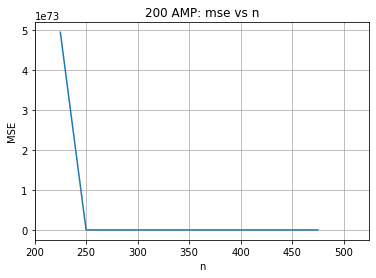

In [13]:
#IST from Jamison

import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

# Define simulation parameters
n = 250
N = 1000
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1
num_iterations = 200

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)


# Generate matrix A
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = non_zero_entries

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)

# Run IST
#for idx_iter in range(num_iterations):
 #   z = y - A @ xHt
  #  r = xHt + s * A.T @ z
   # xHt = eta(r, s*lambda_)
    
    
# calc as L0 norm
def onsager(z, r, tau):
    # tau is different from s*lambda_
    return (z/n) * np.sum(eta(r, tau) != 0)
    #return (z/n) * np.sum(r != 0)  #sums up all the nonzero elements of r

err_sum = 0
ons = 0 #initialize onsager term
tau = 0
r = np.zeros(x.shape)

'''
# AMP running
for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau) #calulate next onsager
    z = y - A @ xHt + ons
    tau = np.sqrt((1/n)) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)
    
    # find the current error
    err_sum = np.sum((x - xHt)**2)
    mse_vs_iterations[idx_iter] = (1/N) * err_sum
    '''
'''
#2 creating y measurements
for n in range(225, 501, 25):
    mat_of_As.append(np.sqrt(1/n) * np.random.randn(n, N))
    # w needs to be same dimensions as y ()
    w = .05 * np.random.randn(n)
    mat_of_ys.append(np.matmul(mat_of_As[cnt], x) + w) #adds a y to the array of y's
    cnt = cnt + 1
    
#3 run 200 IST
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
    # find the current error
    err_sum = np.sum((x - xHt)**2)
    mse_vs_iterations[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 IST: mse vs iterations")
plt.show()

# Prep for IST/AMP
mse_vs_n = np.zeros(11)
n_vec = np.zeros(11)
cnt = 0
#4 MSE vs n calc mse at end of 200 iterations
for loc_n in range(225, 500, 25):
    z = np.zeros(y.shape)
    xHt = np.zeros(x.shape)
    A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
    w = sigma*np.random.randn(loc_n).reshape(-1, 1)
    y = A @ x + w     
    for idx_iter in range(num_iterations):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, s*lambda_)
    mse_vs_n[cnt] = (1/N) * np.sum((x - xHt)**2)
    n_vec[cnt] = loc_n
    cnt += 1

# Plot results
plt.figure()
plt.plot(n_vec, mse_vs_n)
plt.xlabel('n')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 IST: mse vs n")
plt.xlim(200, 525)
plt.show()

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
#6 AMP n = 250
for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau) #calulate next onsager
    z = y - A @ xHt + ons
    tau = np.sqrt((1/n)) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)
    
    # find the current error
    err_sum = np.sum((x - xHt)**2)
    mse_vs_iterations[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 AMP: mse vs iterations")
plt.show()
'''
# Prep for IST/AMP

err_sum = 0
ons = 0 #initialize onsager term
tau = 0
r = np.zeros(x.shape)
mse_vs_n = np.zeros(11)
n_vec = np.zeros(11)
cnt = 0
#7 AMP mse vs n
for loc_n in range(225, 500, 25):
    A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
    w = sigma*np.random.randn(loc_n).reshape(-1, 1)
    y = A @ x + w
    # rst z, r, tau, xHt for next iteration
    z = np.zeros(y.shape)
    r = np.zeros(x.shape)
    tau = 0
    xHt = np.zeros(x.shape)
    for idx_iter in range(num_iterations):
        ons = onsager(z, r, tau) #calulate next onsager
        z = y - A @ xHt + ons
        tau = np.sqrt((1/loc_n)) * np.linalg.norm(z)
        r = xHt + A.T @ z
        xHt = eta(r, tau)
    mse_vs_n[cnt] = (1/N) * np.sum((x - xHt)**2)
    n_vec[cnt] = loc_n
    cnt += 1
print(mse_vs_n)
# Plot results
plt.figure()
plt.plot(n_vec, mse_vs_n)
plt.xlabel('n')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 AMP: mse vs n")
plt.xlim(200, 525)
plt.show()


In [7]:
#AMP set up
import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

# Define simulation parameters
n = 250
N = 1024
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1
num_iterations = 200

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)


# Generate matrix A
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries =  np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = non_zero_entries

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)


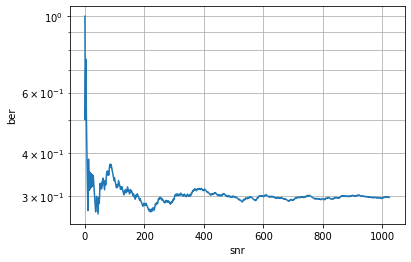

In [53]:
# Week of 10/3
#expanding on AMP. plotting BER vs SNR
# compare x with xHt and see if locations of non-zero entries align
from math import sqrt
import random
import numpy as np

sigma = []
for i in range(1,N+1):
    sigma.append(1 / sqrt((10**(i/10))))     

# AMP running
for idx_iter in range(num_iterations):
    w = random.normalvariate(0, sigma[idx_iter]/sqrt(2)) + 1j*random.normalvariate(0, sigma[idx_iter]/sqrt(2))
    ons = onsager(z, r, tau) #calulate next onsager
    z = y - A @ xHt + ons
    tau = np.sqrt((1/n)) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)


# counting the number of mistakes
err_cnt = 0
ber = []
for i in range(N):  # loop throgh all values of x
    if x[i] == 0 and xHt[i] != 0:
        err_cnt += 1
    if x[i] != 0 and xHt[i] == 0:
        err_cnt += 1
    ber.append(err_cnt / (i+1))

snr = np.arange(0, N, 1)
    
plt.figure()
plt.semilogy(snr, ber)
plt.xlabel('snr')
plt.ylabel('ber')
plt.grid(True, which='both')
#plt.title("200 AMP: mse vs n")
#plt.xlim(200, 525)
plt.show()

#print(err_cnt)